### Project 2: Investigate a Dataset
In this project we analyze the Titanic dataset.

#### Motivation
When the Titanic sank, the majority of passengers and crew were killed. What factors made people more likely to survive?

#### Method
Here we investigate the given dataset of passenger personal information. First, we will explore its structure in order to select the most promising features for further analysis. We will investigate relationships between them and how they affect survival rate. To this end, we will use statistical summaries and various visualizations.

#### Exploring the dataset structure

In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic_data.csv')
df.shape

Populating the interactive namespace from numpy and matplotlib


/Applications/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


(891, 12)

The dataset has 891 observations and 12 variables.

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


The variable of interest is "Survived", indicating whether a certain passenger made it (value 1) or passed away (value 0). Let's look at some summary statistics.

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Univariate analysis
We will continue our analysis focusing on "Age", "Sex" and "Pclass". Age should influence survival, since it is probable that children were saved first. Similarly, it is likely that women had also priority. Finally, it is intriguing to examine if people from upper classes had a better chance, as Pclass is a proxy for socio-economic status.

In [4]:
# Passengers that survived vs passengers that passed away
print(df["Survived"].value_counts())

# As proportions
print(df["Survived"].value_counts(normalize = True))

0    549
1    342
dtype: int64
0    0.616162
1    0.383838
dtype: float64


Here, we verified that most people did not survive, as there was a 62% chance of dying.

Before examining the selected variables, we should make sure that there are not missing values.

In [5]:
def missing_values(field):
    return len(df[field][pd.isnull(df[field])])

print 'Missing values of Age:' , missing_values('Age')
print 'Missing values of Sex:' , missing_values('Sex')
print 'Missing values of Pclass:' , missing_values('Pclass')

Missing values of Age: 177
Missing values of Sex: 0
Missing values of Pclass: 0


At this point we must decide how to handle missing values. We could substitute each missing value with the median of the all present values. This way we may not affect statistics, but we will distort the age distribution. Thus, we will omit rows with missing age to plot the respective histogram. Later in our multivariate analysis, we should be careful to examine the distributions of other features among observations with missing age (aka missingness), before deciding how to handle them.

In [6]:
df_clean = df[pd.notnull(df["Age"])]

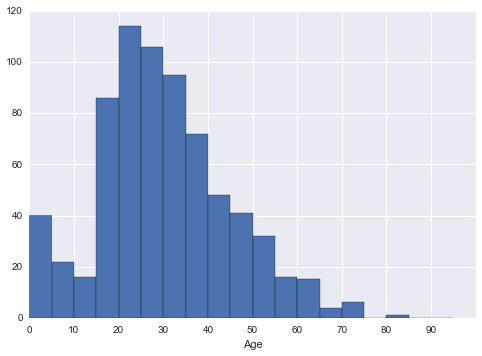

In [7]:
plt.hist(df_clean["Age"], bins = np.arange(0, 100, 5))
plt.xlabel('Age')
plt.xticks(np.arange(0, 100, 10));

Let's also create bar charts for the other two selected variables. Pclass may have integer values, but it is actually a qualitative variable.

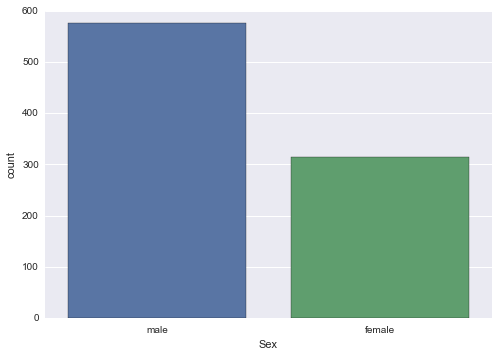

In [8]:
# vanilla matplotlib
# x = [1,2]
# y = df.groupby('Sex').size()
# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.bar(x, y, width=0.5, align='center')
# ax.set_xlabel('Sex')
# ax.set_xticks(x)
# ax.set_xticklabels(['female', 'male']);

sns.countplot(x="Sex", data=df);

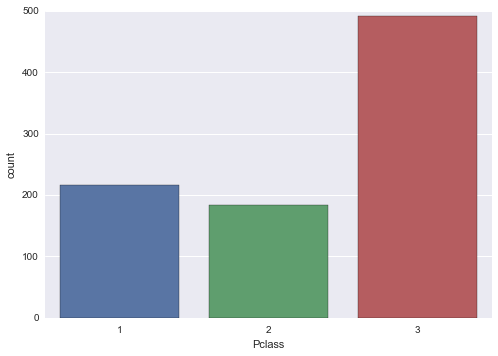

In [9]:
# vanilla matplotlib
# x = [1,2,3]
# y = df.groupby('Pclass').size()
# plt.bar(x, y, width=.5, align='center')
# plt.xlabel('Pclass')
# plt.xticks(x);

sns.countplot(x="Pclass", data=df);

The bar charts above reveal that there were almost twice men as women, as also that passengers of 3rd class were more than passengers of 1st and 2nd class together.

#### Multivariate analysis
We will continue our analysis investigating the effect of the three selected predictor variables to the variable of interest "Survived".

First, we will depict the mean survival rate across age groups, using a bin width of 10 years.

In [10]:
df['Age_group'] = pd.cut(df['Age'], 
                         bins=np.arange(0, 100, 10), 
                         labels=['0-10','10-20','20-30','30-40',
                                 '40-50','50-60','60-70','70-80',
                                 '80-90']
                        )

/Applications/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


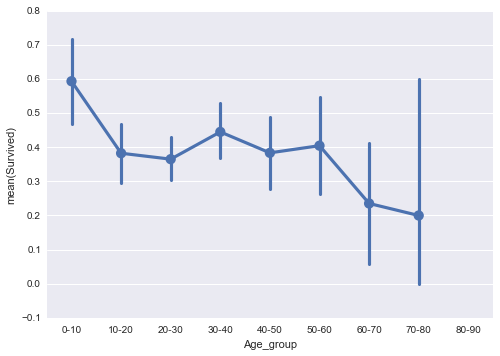

In [11]:
# ax = df.groupby('Age_group').mean()['Survived'].plot()

# tsplot is unsuitable as it makes the assumption we have sampled the same units at each timepoint
# sns.tsplot(data=df_clean, time='Age', unit='PassengerId', condition="Pclass", value='Age')

sns.pointplot(x="Age_group", y="Survived", data=df);

Indeed, children were saved first, with ages 0 to 10 having 1.5 times greater chance of surviving than the rest. We also notice ages 30 to 60 to have greater survival rate than expected. This may be the effect from other variables, like Sex or Pclass. We will create two helper variables to explore further these two age groups.

In [12]:
df["Child"] = float(0)
df["Child"][df["Age"] < 10] = 1

df["Middle_aged"] = float(0)
df["Middle_aged"][(df["Age"] >= 30) & (df["Age"] < 60)] = 1

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [13]:
# since Survived is either 0 or 1, we can use mean()
# to find the survival rate directly and avoid the following:
#
# df["Survived"][df["Child"] == 0].value_counts(normalize = True)
# df["Survived"][df["Child"] == 1].value_counts(normalize = True)

df.groupby('Child')['Survived'].mean().reset_index()

,Child,Survived
0,0,0.366707
1,1,0.612903


In [14]:
df.groupby('Sex')['Survived'].mean().reset_index()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Here we confirm our hypothesis that women were given priority. Their survival rate was almost 4 times that of men.

In [15]:
df.groupby('Pclass')['Survived'].mean().reset_index()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Also, it seems that passengers of 1st and 2nd class had a much better chance of surviving. This is not necessarily a direct effect, but other factors such as age or gender may be interfering.

Thus, we will explore the age and gender distribution for each Pclass.

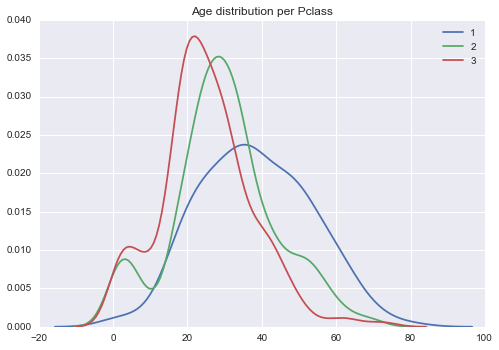

In [16]:
# grouped = df.groupby('Pclass')
# grouped.boxplot(column='Age', layout=(1,3), return_type='axes');

ax = plt.axes()
# sns.kdeplot(df['Age'][df["Pclass"]==1], label="Pclass: 1")
# sns.kdeplot(df['Age'][df["Pclass"]==2], label="Pclass: 2")
# sns.kdeplot(df['Age'][df["Pclass"]==3], label="Pclass: 3")
gr = df.groupby('Pclass')['Age']
for label, arr in gr:
    sns.kdeplot(arr, label=label)
ax.set(title='Age distribution per Pclass');

First, we observe that higher classes correspond to greater mean age. Also, there is a bump in ages 0-10 for Pclass 2 and 3, but there is not one for Pclass 1.  
Furthermore, the middle aged group that showed a greater survival rate, seem to overlap with the majority of 1st class passengers. Therefore, here we observe how Pclass correlates with age and also affects directly chances of survival, against the inverse trend due to age.

Next, it would be interesting to explore the age distribution of each sex, as also the proportions of males/females for each Pclass. Instead, we will depict these relations in a combined graph.

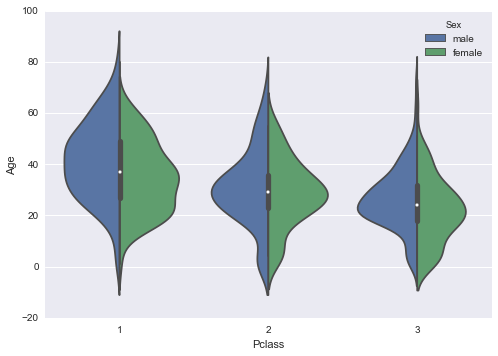

In [17]:
sns.violinplot(x="Pclass", y="Age", hue="Sex", data=df, split=True);

Male passengers of 1st class seem to be older on average than the female. On the contrary, passengers of 2nd and 3rd class are equally distributed between sexes.

Now let's explore survival rate across age groups as before, while discriminating each Pclass and then each sex.

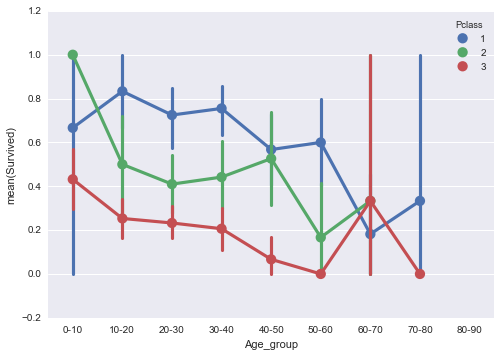

In [18]:
sns.pointplot(x="Age_group", y="Survived", data=df, hue="Pclass");

Here it is shown that Pclass was a much stronger factor to determine your fate, than your age.

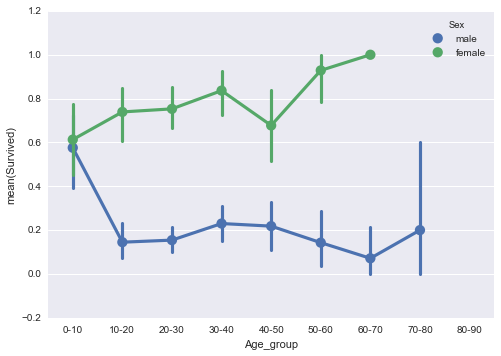

In [19]:
sns.pointplot(x="Age_group", y="Survived", data=df, hue="Sex");

Again, sex was a much stronger factor than age. Being a female increased dramatically your chances compared to males of same age. There is only one exception for ages 0-10, where their survival rate seem to have been independent of sex.

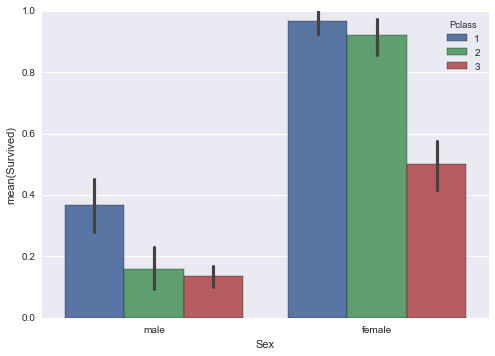

In [20]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=df);

Finally, we visualize mean survival rate across Sex and Pclass. The trend that passengers of higher class were saved first, is consistent between sexes. The most interesting fact is that men of 1st class had almost the same survival rate as women of 3rd class.

So far, we have depicted in numerous ways how our chosen features interweave. We have also shown that these variables affect strongly chances of survival. In order to investigate quantitatively the influence of each one, as also the dependencies between them, we will create a correlation matrix. Missing values are excluded by default. To include variable Sex, we must assign first a numerical value to each level of the categorical variable: male=0 and female=1.

In [21]:
df["Sex_class"] = float('NaN')
df["Sex_class"][df["Sex"] == "male"] = 0
df["Sex_class"][df["Sex"] == "female"] = 1

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [22]:
df[['Age','Sex_class','Pclass','Child','Middle_aged','Survived']].corr()

,Age,Sex_class,Pclass,Child,Middle_aged,Survived
Age,1.000000,-0.093254,-0.369226,-0.544155,0.609177,-0.077221
Sex_class,-0.093254,1.000000,-0.131900,0.075254,0.014204,0.543351
Pclass,-0.369226,-0.131900,1.000000,0.104857,-0.279976,-0.338481
Child,-0.544155,0.075254,0.104857,1.000000,-0.196805,0.128812
Middle_aged,0.609177,0.014204,-0.279976,-0.196805,1.000000,0.050201
Survived,-0.077221,0.543351,-0.338481,0.128812,0.050201,1.000000


The matrix shows that Sex, Pclass and Child are indeed variables with noticeable correlation with survival rate.

#### Conclusions
We have explored the Titanic dataset by investigating the distribution of selected features and their relationship to survival rate. Sex seem to have been the strongest factor to increase your chances of survival, as being a woman increased dramatically your chances compared to a man with similar other characteristics. Even so, passenger class was also such a strong factor, that men of 1st class had the same chances with women of 3rd class. Finally, we discovered that age generally did not played a decisive role for survival, with the exception that children of ages 0 to 10 were saved with absolute priority, regardless of sex or class. All in all, we confirmed our hypothesis that these features should have affected strongly the chances of survival of a passenger, using a variety of analyses, both qualitative and quantitative. Moreover, we have discovered dependencies between features, such as that middle aged passengers were travelling mainly 1st class.

Nevertheless, our findings do not imply that these factors solely were able to seal the fate of each passenger. There are other variables in this dataset that may play a significant role. For example, members of one family may have been saved together, or the lower the deck on which a passenger was, the more difficult it may have been to reach a lifeboat. Furthermore, it is likely to have some biases in the dataset, such as that available information may be inaccurate for passengers that did not survive or depending on where they issued their ticket. Still, we have discovered features with strong correlation with survival rate, and thus it is possible for someone to build a predictive model based on this dataset.